In [527]:
# dataframe management
import pandas as pd             

# numerical computation
import numpy as np

#import re

# visualization library
import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set_context(rc={"font.family":'sans',"font.size":24,"axes.titlesize":24,"axes.labelsize":24})   


# import matplotlib and allow it to plot inline
import matplotlib.pyplot as plt
#%matplotlib inline

#for k-Means
from sklearn.cluster import KMeans

from datetime import datetime, timedelta, date
#from scipy.stats import skew
from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, ElasticNet, Lasso, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [528]:
# for model persistence:
#https://scikit-learn.org/stable/modules/model_persistence.html
""">>> from sklearn import svm
>>> from sklearn import datasets
>>> clf = svm.SVC(gamma='scale')
>>> iris = datasets.load_iris()
>>> X, y = iris.data, iris.target
>>> clf.fit(X, y)  
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

>>> import pickle
>>> s = pickle.dumps(clf)
>>> clf2 = pickle.loads(s)
>>> clf2.predict(X[0:1])
array([0])
>>> y[0]
0"""
#---------------------

"""import pickle

a = {'hello': 'world'}

with open('filename.pickle', 'wb') as handle:
    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)

with open('filename.pickle', 'rb') as handle:
    b = pickle.load(handle)

print a == b"""

"import pickle\n\na = {'hello': 'world'}\n\nwith open('filename.pickle', 'wb') as handle:\n    pickle.dump(a, handle, protocol=pickle.HIGHEST_PROTOCOL)\n\nwith open('filename.pickle', 'rb') as handle:\n    b = pickle.load(handle)\n\nprint a == b"

In [529]:
import importlib #importlib.reload(WhatToReimport)
import hw5
importlib.reload(hw5)
from sklearn.model_selection import train_test_split
import scipy

In [530]:
d=hw5.Dataset()

# Data exploration

In [531]:
d.data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


In [532]:
d.data.shape

(1010, 150)

In [533]:
"""categorical_variables_mask = (d.data.dtypes==object) 
categorical_variables = categorical_variables_mask.tolist()
numerical_variables = d.data.columns[~categorical_variables_mask]
cov=d.data[numerical_variables].corr(method='pearson')
cm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(150, 150))
cm.cax.set_visible(False)
#cm=sns.heatmap(cov, annot=True, center=0, cmap="Blues")"""

'categorical_variables_mask = (d.data.dtypes==object) \ncategorical_variables = categorical_variables_mask.tolist()\nnumerical_variables = d.data.columns[~categorical_variables_mask]\ncov=d.data[numerical_variables].corr(method=\'pearson\')\ncm = sns.clustermap(cov, annot=True, center=0, cmap="Blues", figsize=(150, 150))\ncm.cax.set_visible(False)\n#cm=sns.heatmap(cov, annot=True, center=0, cmap="Blues")'

# Preprocessing

## Missing values of the target feature

In [534]:
nulls = d.data.isnull().sum()
sorted([(x,y) for (x,y) in zip(nulls.index, nulls) if y>0], key=lambda x: x[1], reverse=True)

[('Height', 20),
 ('Weight', 20),
 ('Passive sport', 15),
 ('Chemistry', 10),
 ('Geography', 9),
 ('Punk', 8),
 ('Latino', 8),
 ('Documentary', 8),
 ('Theatre', 8),
 ('Smoking', 8),
 ('Classical music', 7),
 ('Reggae, Ska', 7),
 ('Rock n roll', 7),
 ('Alternative', 7),
 ('Techno, Trance', 7),
 ('Countryside, outdoors', 7),
 ('Gardening', 7),
 ('Daily events', 7),
 ('Final judgement', 7),
 ('Criminal damage', 7),
 ('Compassion to animals', 7),
 ('Age', 7),
 ('Rock', 6),
 ('Swing, Jazz', 6),
 ('Movies', 6),
 ('PC', 6),
 ('Biology', 6),
 ('Reading', 6),
 ('Art exhibitions', 6),
 ('Writing', 6),
 ('Science and technology', 6),
 ('Friends versus money', 6),
 ('Giving', 6),
 ('Responding to a serious letter', 6),
 ('Number of siblings', 6),
 ('Gender', 6),
 ('Folk', 5),
 ('Country', 5),
 ('Psychology', 5),
 ('Economy Management', 5),
 ('Foreign languages', 5),
 ('Medicine', 5),
 ('Spiders', 5),
 ('Alcohol', 5),
 ('Prioritising workload', 5),
 ('Workaholism', 5),
 ('Self-criticism', 5),
 ('Em

We have to manage all these missing values. <br>
First of all I will remove all the rows that have the target feature "Empathy" to null because they have no use. 

In [535]:
#removing the rows in which the Empathy attrivute is null
#they are not necessary for train or testing
nullsEmpathy = d.data["Empathy"].isnull().sum()
#nullsEmpathy = 5
print("Number of rows with Empathy that is null: "+str(nullsEmpathy))
d.data = d.data[d.data["Empathy"].notna()]
print("Number of rows with Empathy that is null after: "+str(d.data["Empathy"].isnull().sum()))

Number of rows with Empathy that is null: 5
Number of rows with Empathy that is null after: 0


## Dealing with the categorical variables

Now I have to deal with the categorical variables. <br>
The first thing that I have to do is to impute the missing values of them. I will use the mode() (which is the most common value for each feature) to impute them.

In [536]:
#idea, provare a predirre i valori mancanti!

In [537]:
categorical=d.data.select_dtypes(include="object", exclude="float")

In [538]:
d.data = d.data.select_dtypes(exclude="object")

In [539]:
categorical.mode().loc[0]

Smoking                         tried smoking
Alcohol                        social drinker
Punctuality               i am always on time
Lying                               sometimes
Internet usage                few hours a day
Gender                                 female
Left - right handed              right handed
Education                    secondary school
Only child                                 no
Village - town                           city
House - block of flats         block of flats
Name: 0, dtype: object

In [540]:
print(categorical.isnull().sum())
categorical = categorical.fillna(categorical.mode().loc[0])
print(categorical.isnull().sum())

Smoking                   8
Alcohol                   5
Punctuality               2
Lying                     2
Internet usage            0
Gender                    6
Left - right handed       3
Education                 1
Only child                2
Village - town            4
House - block of flats    4
dtype: int64
Smoking                   0
Alcohol                   0
Punctuality               0
Lying                     0
Internet usage            0
Gender                    0
Left - right handed       0
Education                 0
Only child                0
Village - town            0
House - block of flats    0
dtype: int64


### From categorical to scale

From various attempts it turns out that one-hot encoding of all th variables leads to bad results. <br>
From the theory we can understand this result because one hot encoding leads to have too many features and, moreover, the values of this categorical attributes are actually in a scale of values even if they are strings, to the best thing to do is to turn them in integers with a scale. (As done below)<br>
I will do one-hot encoding only fot the binary features where the two values represents different things.

In [541]:
categorical.shape

(1005, 11)

In [542]:
categorical.columns

Index(['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet usage',
       'Gender', 'Left - right handed', 'Education', 'Only child',
       'Village - town', 'House - block of flats'],
      dtype='object')

In [543]:
categorical.columns=['Smoking', 'Alcohol', 'Punctuality', 'Lying', 'Internet_usage',
       'Gender', 'Left_right_handed', 'Education', 'Only_child',
       'Village_town', 'House_block_of_flats']

In [544]:
categorical.describe()

,Smoking,Alcohol,Punctuality,Lying,Internet_usage,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
count,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005
unique,4,3,3,4,4,2,2,6,2,2,2
top,tried smoking,social drinker,i am always on time,sometimes,few hours a day,female,right handed,secondary school,no,city,block of flats
freq,437,663,400,546,741,596,904,619,754,707,594


In [545]:
categorical.Smoking.unique()

array(['never smoked', 'tried smoking', 'former smoker', 'current smoker'],
      dtype=object)

In [546]:
for row in categorical.itertuples():#range(len(categorical["Smoking"])):
    #print(row)
    #if(i==607 or i==722 or i==845 or i==858 or i==921 ):
    #    continue
    #print(row.Smoking)
    #print(row.Index)
    if(row.Smoking=="never smoked"):
        categorical['Smoking'][row.Index]=1
        continue
    if(row.Smoking=="tried smoking"):
        categorical['Smoking'][row.Index]=2
        continue
    if(row.Smoking=="former smoker"):
        categorical['Smoking'][row.Index]=3
        continue
    if(row.Smoking=="current smoker"):
        categorical['Smoking'][row.Index]=4
        continue

In [547]:
categorical.Smoking.unique()

array([1, 2, 3, 4], dtype=object)

In [548]:
categorical.Alcohol.unique()

array(['drink a lot', 'social drinker', 'never'], dtype=object)

In [549]:
for row in categorical.itertuples():
    if(row.Alcohol=="never"):
        categorical['Alcohol'][row.Index]=1
        continue
    if(row.Alcohol=="social drinker"):
        categorical['Alcohol'][row.Index]=2
        continue
    if(row.Alcohol=="drink a lot"):
        categorical['Alcohol'][row.Index]=3
        continue

In [550]:
categorical.Alcohol.unique()

array([3, 2, 1], dtype=object)

In [551]:
categorical.Punctuality.unique()

array(['i am always on time', 'i am often early',
       'i am often running late'], dtype=object)

In [552]:
for row in categorical.itertuples():
    if(row.Punctuality=="i am often running late"):
        categorical['Punctuality'][row.Index]=1
        continue
    if(row.Punctuality=="i am always on time"):
        categorical['Punctuality'][row.Index]=2
        continue
    if(row.Punctuality=="i am often early"):
        categorical['Punctuality'][row.Index]=3
        continue

In [553]:
categorical.Punctuality.unique()

array([2, 3, 1], dtype=object)

In [554]:
categorical.Lying.unique()

array(['never', 'sometimes', 'only to avoid hurting someone',
       'everytime it suits me'], dtype=object)

In [555]:
for row in categorical.itertuples():
    if(row.Lying=="everytime it suits me"):
        categorical['Lying'][row.Index]=1
        continue
    if(row.Lying=="sometimes"):
        categorical['Lying'][row.Index]=2
        continue
    if(row.Lying=="only to avoid hurting someone"):
        categorical['Lying'][row.Index]=3
        continue
    if(row.Lying=="never"):
        categorical['Lying'][row.Index]=4
        continue

In [556]:
categorical.Lying.unique()

array([4, 2, 3, 1], dtype=object)

In [557]:
categorical.Internet_usage.unique()

array(['few hours a day', 'most of the day', 'less than an hour a day',
       'no time at all'], dtype=object)

In [558]:
for row in categorical.itertuples():
    if(row.Internet_usage=="most of the day"):
        categorical['Internet_usage'][row.Index]=1
        continue
    if(row.Internet_usage=="few hours a day"):
        categorical['Internet_usage'][row.Index]=2
        continue
    if(row.Internet_usage=="less than an hour a day"):
        categorical['Internet_usage'][row.Index]=3
        continue
    if(row.Internet_usage=="no time at all"):
        categorical['Internet_usage'][row.Index]=4
        continue

In [559]:
categorical.Internet_usage.unique()

array([2, 1, 3, 4], dtype=object)

In [560]:
categorical.Education.unique()

array(['college/bachelor degree', 'secondary school', 'primary school',
       'masters degree', 'doctorate degree',
       'currently a primary school pupil'], dtype=object)

In [561]:
for row in categorical.itertuples():
    if(row.Education=="currently a primary school pupil"):
        categorical['Education'][row.Index]=1
        continue
    if(row.Education=="primary school"):
        categorical['Education'][row.Index]=2
        continue
    if(row.Education=="secondary school"):
        categorical['Education'][row.Index]=3
        continue
    if(row.Education=="college/bachelor degree"):
        categorical['Education'][row.Index]=4
        continue
    if(row.Education=="masters degree"):
        categorical['Education'][row.Index]=5
        continue
    if(row.Education=="doctorate degree"):
        categorical['Education'][row.Index]=6
        continue

In [562]:
categorical.Education.unique()

array([4, 3, 2, 5, 6, 1], dtype=object)

In [563]:
categorical.describe()

,Smoking,Alcohol,Punctuality,Lying,Internet_usage,Gender,Left_right_handed,Education,Only_child,Village_town,House_block_of_flats
count,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005
unique,4,3,3,4,4,2,2,6,2,2,2
top,2,2,2,2,2,female,right handed,3,no,city,block of flats
freq,437,663,400,546,741,596,904,619,754,707,594


#### One-hot encoding of categorical variables that are left

In [564]:
categorical.shape

(1005, 11)

In [565]:
categorical["Smoking"]=categorical["Smoking"].astype("float64")
categorical["Alcohol"]=categorical["Alcohol"].astype("float64")
categorical["Punctuality"]=categorical["Punctuality"].astype("float64")
categorical["Lying"]=categorical["Lying"].astype("float64")
categorical["Internet_usage"]=categorical["Internet_usage"].astype("float64")
categorical["Education"]=categorical["Education"].astype("float64")

In [566]:
categorical.dtypes

Smoking                 float64
Alcohol                 float64
Punctuality             float64
Lying                   float64
Internet_usage          float64
Gender                   object
Left_right_handed        object
Education               float64
Only_child               object
Village_town             object
House_block_of_flats     object
dtype: object

In [567]:
categorical2=categorical.select_dtypes(include="object", exclude="float64")
categorical = categorical.select_dtypes(exclude="object")

In [568]:
categoricalDummied = pd.get_dummies(categorical2)

In [569]:
categoricalDummied.shape

(1005, 10)

#### Imputation of missing values for the numerical features

I wil use the mean value of each attribute to impute the value of missing values for numerical features

In [570]:
d.data=d.data.fillna(d.data.mean())

## Outliers: Boxplot and Winsorizing

In [571]:
d.data.quantile(.99).sort_values(ascending=False).head(8)

Height                194.96
Weight                102.92
Age                    29.00
Number of siblings      5.00
Geography               5.00
Religion                5.00
Art exhibitions         5.00
Cars                    5.00
Name: 0.99, dtype: float64

In [572]:
def q(col, quant, f):
    t = d.data[col].quantile(quant)
    print(f'col {col} at {quant}-th quantile => {t}')
    d.data.loc[f(d.data[col], t), col] = t

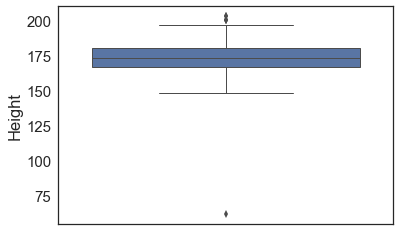

In [573]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 1})
sns.boxplot(y="Height", data=d.data)

col Height at 0.99-th quantile => 194.96000000000004
col Height at 0.1-th quantile => 162.0


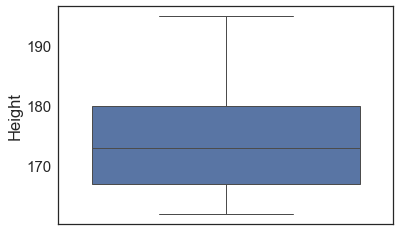

In [574]:
q("Height", .99, lambda x, y: x > y)
q("Height", .1, lambda x,y: x < y)
sns.boxplot(y="Height", data=d.data)

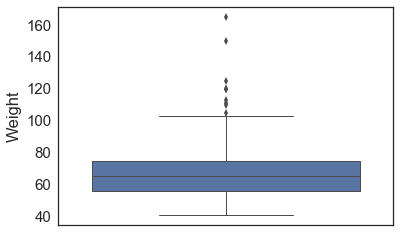

In [575]:
sns.boxplot(y="Weight", data=d.data)

col Weight at 0.99-th quantile => 102.92000000000007
col Weight at 0.1-th quantile => 51.0


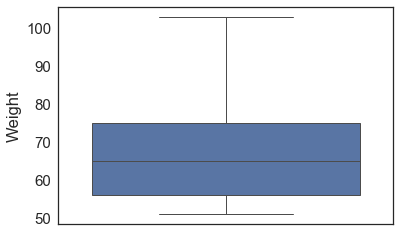

In [576]:
q("Weight", .99, lambda x, y: x > y)
q("Weight", .1, lambda x,y: x < y)
sns.boxplot(y="Weight", data=d.data)

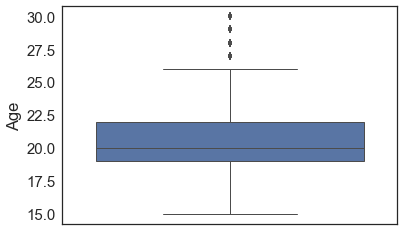

In [577]:
sns.boxplot(y="Age", data=d.data)

col Age at 0.95-th quantile => 27.0


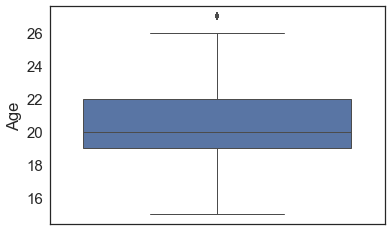

In [578]:
q("Age", .95, lambda x, y: x > y)
#q("Age", .1, lambda x,y: x < y)
sns.boxplot(y="Age", data=d.data)

## Normalization of Numerical Variables

In [579]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(1, 5), copy=True)
scaled_df = scaler.fit_transform(d.data)
scaled_df = pd.DataFrame(scaled_df, columns=d.data.columns)

C:\Users\andre\Anaconda3\envs\cs412\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [580]:
d.data=scaled_df

In [581]:
d.data= pd.concat([d.data,categoricalDummied,categorical],axis=1,join='inner')

In [582]:
d.data.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Village_town_city,Village_town_village,House_block_of_flats_block of flats,House_block_of_flats_house/bungalow,Smoking,Alcohol,Punctuality,Lying,Internet_usage,Education
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,4.737207,3.331662,3.112452,2.289450,2.124620,2.956691,2.764763,3.466407,3.767595,2.360725,...,0.704000,0.296000,0.592000,0.408000,2.340000,2.095000,2.048000,2.235000,2.022000,3.286000
std,0.658470,0.831812,1.170802,1.137512,1.076897,1.246873,1.260678,1.158217,1.178434,1.376239,...,0.456719,0.456719,0.491709,0.491709,1.004694,0.576461,0.773495,0.744533,0.519409,0.782826
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000,2.000000,3.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,1.000000,0.000000,1.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000,3.000000,3.000000,2.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,3.000000,4.000000,4.000000,6.000000


In [583]:
nulls = d.data.isnull().sum()
sorted([(x,y) for (x,y) in zip(nulls.index, nulls) if y>0], key=lambda x: x[1], reverse=True)

[]

In [584]:
d.data.shape

(1000, 155)

In [585]:
"""# take the numerical features
numeric_feats = d.data.dtypes[d.data.dtypes != "object" ].index
# compute the skewness but only for non missing variables (we already imputed them but just in case ...)
skewed_feats = d.data[numeric_feats].apply(lambda x: skew(x.dropna()))

skewness = pd.DataFrame({"Variable":skewed_feats.index, "Skewness":skewed_feats.data})
# select the variables with a skewness above a certain threshold
skewness = skewness.sort_values('Skewness', ascending=[0])
f, ax = plt.subplots(figsize=(40,35))
plt.xticks(rotation='90')
sns.barplot(x=skewness['Variable'], y=skewness['Skewness'])
plt.ylim(0,5)
plt.xlabel('Numerical Variables', fontsize=15)
plt.ylabel('Skewness', fontsize=15)
plt.title('', fontsize=15)"""

'# take the numerical features\nnumeric_feats = d.data.dtypes[d.data.dtypes != "object" ].index\n# compute the skewness but only for non missing variables (we already imputed them but just in case ...)\nskewed_feats = d.data[numeric_feats].apply(lambda x: skew(x.dropna()))\n\nskewness = pd.DataFrame({"Variable":skewed_feats.index, "Skewness":skewed_feats.data})\n# select the variables with a skewness above a certain threshold\nskewness = skewness.sort_values(\'Skewness\', ascending=[0])\nf, ax = plt.subplots(figsize=(40,35))\nplt.xticks(rotation=\'90\')\nsns.barplot(x=skewness[\'Variable\'], y=skewness[\'Skewness\'])\nplt.ylim(0,5)\nplt.xlabel(\'Numerical Variables\', fontsize=15)\nplt.ylabel(\'Skewness\', fontsize=15)\nplt.title(\'\', fontsize=15)'

# Training and Testing sets

In [586]:
X = d.data.drop(columns=['Empathy'])
Y = d.data['Empathy']

I have now to trasform the target feature from a scale from 1 to 5 to a binary variable 0 (if the vale is 1,2 or 3) and 1 (4 ot 5).

In [587]:
def getBinary(x):
    res=[]
    for i in range(len(x)):
        if(x[i]<=3):
            res.append(0)
        else:
            res.append(1)
    res = np.array(res)
    return res
"""def getBinary(x):
    for index, row in x.iterrows():
        if(row['Empathy']<=3):
            row['Empathy']=0
        else:
            row['Empathy']=1"""
        

"def getBinary(x):\n    for index, row in x.iterrows():\n        if(row['Empathy']<=3):\n            row['Empathy']=0\n        else:\n            row['Empathy']=1"

# Baseline

In [588]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y, test_size=0.2, random_state=40)

In [589]:
"""X_train=np.array(X_train.values)
Y_train=np.array(Y_train.values)
X_test=np.array(X_test.values)
Y_test=np.array(Y_test.values)
Y=np.array(Y.values)"""

'X_train=np.array(X_train.values)\nY_train=np.array(Y_train.values)\nX_test=np.array(X_test.values)\nY_test=np.array(Y_test.values)\nY=np.array(Y.values)'

In [590]:
#use predict the most common or random

I will use as baseline a dump predictor that predict always the most frequent.

In [591]:
Y_train=getBinary(Y_train.values)
Y_test=getBinary(Y_test.values)
Y=getBinary(Y.values)

In [592]:
def trainBaseline(x):
    return scipy.stats.mode(x)[0][0]

In [593]:
mode=trainBaseline(Y_train)

In [594]:
def predictBaseline(test,mostfrequent):
    res=[]
    for i in range(len(test)):
        res.append(mostfrequent)
    return np.array(res)

In [595]:
predictions=predictBaseline(X_test,mode)

In [596]:
np.mean(predictions==Y_test)

0.665

Usign the 20% of my dataset as testing set, this base predictor has an accuracy of 66%

# Model1

I start trying a Logistic Regression algoritm, I choose as solver the 'liblinear' one that should be one of the most suitable for binary classification in small databases. <br>
I'll use the L2 norm for the penalization and a value of C very small. C is the inverse of regularization strength, like in support vector machines, smaller values specify stronger regularization.

In [597]:
from sklearn.linear_model import LogisticRegression
logReg = LogisticRegression(solver='liblinear',random_state=123, C=0.1,penalty='l2', multi_class='ovr')
logReg.fit(X_train, Y_train)

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l2', random_state=123, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [598]:
predict_train = logReg.predict(X_train) 

In [599]:
np.mean(predict_train == Y_train)

0.8175

In [600]:
predict_test = logReg.predict(X_test) 

In [601]:
np.mean(predict_test == Y_test)

0.7

We have already achieved an accuracy of 82% on the training set and an accuracy of 70% on the testing one.

Now I will try to have a better idea of the real accuracy that that model can reach using a Stratified K-Fold cross validation.

In [602]:
X.shape

(1000, 154)

In [603]:
np.mean(cross_val_score(logReg, X, Y, cv=240))

0.7020833333333333

# Model2

In [612]:
def svc_param_selection(X_t, Y_t, n):
    params = {'C': [0.001, 0.01, 0.1, 1, 10], 'gamma' : [0.001, 0.01, 0.1, 1]}
    gs = GridSearchCV(svm.SVC(kernel='rbf'), params, cv=n,n_jobs=-1)
    gs.fit(X_t, Y_t)
    return gs.best_params_

In [613]:
svc_param_selection(X_train,Y_train,20)

{'C': 10, 'gamma': 0.01}

In [614]:
model2=svm.SVC(kernel='rbf',C= 10, gamma= 0.01)
model2.fit(X_train,Y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [615]:
prediction2=model2.predict(X_test)

In [616]:
np.mean(prediction2 == Y_test)

0.72

# Model 3

In [57]:
# Very heavy to run:
rfc = RandomForestClassifier()
params = {'n_estimators': [4, 15,20,50,100,200,250,300,350], 
        #'n_estimators': [4, 6, 9,15,20,50,100,150,200,250,300,350], 
              #'max_features': ['log2', 'sqrt','auto'],
              'max_features': ['auto'],
              #'criterion': ['entropy', 'gini'],
              'criterion': ['gini'],
              'max_depth': [3, 5, 10,50,100,250], 
              'min_samples_split': [2,3, 5,10,15],
              'min_samples_leaf': [1,5,8,18]
              #'max_depth': [2, 3, 5, 10,15,20,25,30,50,100], 
              #'min_samples_split': [2, 3, 5,10],
              #'min_samples_leaf': [1,5,8]
             }
gs = GridSearchCV(clf, params,iid=False,cv=10,n_jobs=-1)
gs = gs.fit(X_train, Y_train)
rfc = gs.best_estimator_
rfc.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [58]:
gs.best_params_

{'criterion': 'gini',
 'max_depth': 100,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 250}

In [59]:
prediction3=rfc.predict(X_test)

In [60]:
np.mean(prediction3 == Y_test)

0.7164179104477612

In [ ]:
#redone with new preprocessing:

In [814]:
model3=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=129,  
            warm_start=False)
model3.fit(X_train,Y_train)
predict3=model3.predict(X_test)
np.mean(predict3 == Y_test)

0.76

# Model 4

In [647]:
import xgboost as xgb

In [667]:
xg_reg = xgb.XGBClassifier(n_estimators = 300)

In [668]:
xg_reg.fit(X_train,Y_train)

preds = xg_reg.predict(X_test)

In [669]:
xg_reg.score(X_test,Y_test) 

0.715

In [74]:
#heavy to run
xgboostClass = xgb.XGBClassifier()
parameters = {'n_estimators': [4, 15,20,50,100,200,250,300,350,500,1000],
              'objective': ['reg:logistic','binary:logistic'],
              'max_depth': [3, 5, 10,50,100,250],
              'learning_rate': [0.1,0.5,0.3,0.8,0.01,0.003],
              "subsample": [0.6, 0.4],
              "colsample_bytree": [0.7, 0.3],
              "gamma": [0, 0.5 ]
             }

In [75]:
grid_obj = GridSearchCV(xgboostClass, parameters,iid=False,cv=10,n_jobs=-1)
grid_obj = grid_obj.fit(X_train, Y_train)

# Set the clf to the best combination of parameters
clf = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
clf.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.01,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [76]:
grid_obj.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.01,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=1000, n_jobs=1, nthread=None, objective='reg:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [77]:
predict4=clf.predict(X_test)

In [79]:
np.mean(predict4 == Y_test)

0.7213930348258707

In [651]:
prova = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.001,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=6000, n_jobs=1, nthread=None, objective='reg:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [652]:
prova.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.001,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=6000, n_jobs=1, nthread=None, objective='reg:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [653]:
predict5=prova.predict(X_test)

In [654]:
np.mean(predict5 == Y_test)

0.735

In [785]:
prova = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.001,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=6000, n_jobs=-1, nthread=None, objective='reg:logistic',
       random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)
prova.fit(X_train, Y_train)
predict5=prova.predict(X_test)
np.mean(predict5 == Y_test)

0.73

# Dimensionality reduction

## PCA

In [741]:
X.shape

(1000, 154)

In [742]:
X_train.shape

(800, 154)

In [752]:
from sklearn.decomposition import PCA
pca = PCA(n_components=130)
X_trainPCA = pca.fit_transform(X_train)
X_testPCA = pca.fit_transform(X_test)
print(X_trainPCA.shape)

(800, 130)


In [753]:
model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=223,  
            warm_start=False)
model.fit(X_trainPCA,Y_train)
predict=model.predict(X_testPCA)
np.mean(predict == Y_test)

0.665

Tuning of PCA

In [755]:
for i in [50,80,100,115,130,150]:
    pca = PCA(n_components=i)
    X_trainPCA = pca.fit_transform(X_train)
    X_testPCA = pca.fit_transform(X_test)
    print("number of feature of PCA: "+str(X_trainPCA.shape[1]))
    model=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=223,  
            warm_start=False)
    model.fit(X_trainPCA,Y_train)
    predict6=model.predict(X_testPCA)
    print(np.mean(predict6 == Y_test))
    print("\n")

number of feature of PCA: 50
0.675


number of feature of PCA: 80
0.655


number of feature of PCA: 100
0.655


number of feature of PCA: 115
0.67


number of feature of PCA: 130
0.665


number of feature of PCA: 150
0.665




## Feature Selection

In [749]:
model_simple = RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
model_simple = model_simple.fit(X_train, Y_train)

In [750]:
# Get numerical feature importances
importances = list(model_simple.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(X_train, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: Judgment calls       Importance: 0.03
Variable: Psychology           Importance: 0.02
Variable: Friends versus money Importance: 0.02
Variable: Compassion to animals Importance: 0.02
Variable: Life struggles       Importance: 0.02
Variable: Height               Importance: 0.02
Variable: Weight               Importance: 0.02
Variable: Dance                Importance: 0.01
Variable: Folk                 Importance: 0.01
Variable: Country              Importance: 0.01
Variable: Classical music      Importance: 0.01
Variable: Pop                  Importance: 0.01
Variable: Rock                 Importance: 0.01
Variable: Metal or Hardrock    Importance: 0.01
Variable: Punk                 Importance: 0.01
Variable: Hiphop, Rap          Importance: 0.01
Variable: Reggae, Ska          Importance: 0.01
Variable: Swing, Jazz          Importance: 0.01
Variable: Rock n roll          Importance: 0.01
Variable: Alternative          Importance: 0.01
Variable: Latino               Importan

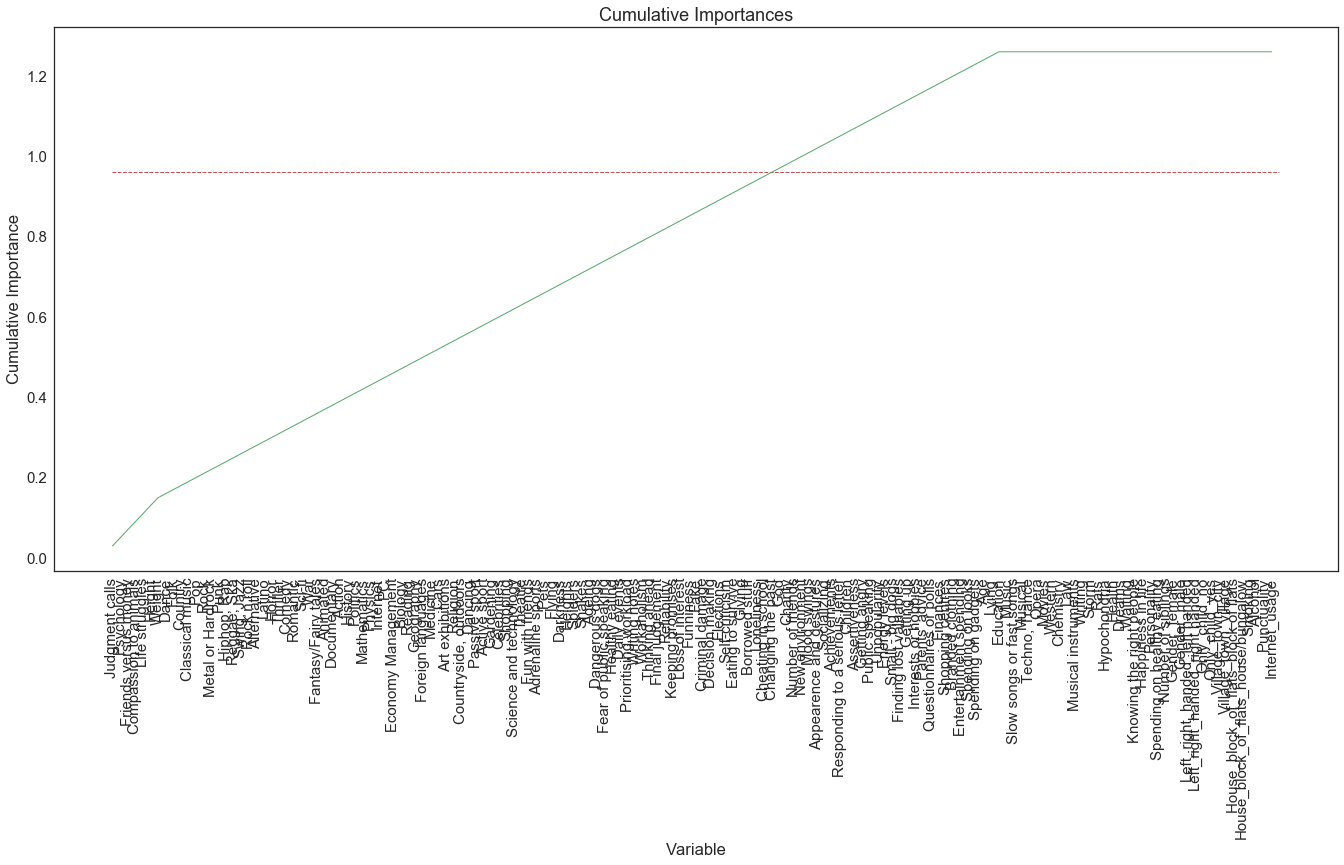

In [751]:
# list of x locations for plotting
x_values = list(range(len(importances)))
    
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)

fig = plt.figure(figsize = (23,10))
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')

# Draw line at 96% of importance retained
plt.hlines(y = 0.96, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')

# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')

# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');
    

In [778]:
f=[]
for i in range(120):
    f.append(feature_importances[i][0])
f=np.array(f)

In [781]:
X_train[f]

(800, 120)

In [782]:
model3=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=223,  
            warm_start=False)
model3.fit(X_train[f],Y_train)
predict3=model3.predict(X_test[f])
np.mean(predict3 == Y_test)

0.715

In [786]:
prova = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.3, gamma=0.5, learning_rate=0.001,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=6000, n_jobs=-1, nthread=None, objective='reg:logistic',
       random_state=123, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)
prova.fit(X_train[f], Y_train)
predict5=prova.predict(X_test[f])
np.mean(predict5 == Y_test)

0.745

In [819]:
model3=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=100, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=5,
            min_weight_fraction_leaf=0.0, n_estimators=250, n_jobs=None,
            oob_score=False, random_state=i,  
            warm_start=False)
model3.fit(X_train[f],Y_train)
predict3=model3.predict(X_test[f])
np.mean(predict3 == Y_test)

0.74

In [833]:
from sklearn.linear_model import RidgeClassifier
model4 = RidgeClassifier(random_state=123)
model4 = model4.fit(X_train, Y_train)
predict4 = model4.predict(X_test)
np.mean(predict4==Y_test)

0.705

In [834]:
from sklearn.linear_model import RidgeClassifier
model4 = RidgeClassifier(random_state=123)
model4 = model4.fit(X_trainPCA, Y_train)
predict4 = model4.predict(X_testPCA)
np.mean(predict4==Y_test)

0.66

In [838]:
from sklearn.linear_model import RidgeClassifier
model4 = RidgeClassifier(random_state=123)
model4 = model4.fit(X_train[f], Y_train)
predict4 = model4.predict(X_test[f])
np.mean(predict4==Y_test)

0.715

In [739]:
import tensorflow as tf
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(6, activation=tf.nn.relu),
  tf.keras.layers.Dense(8, activation=tf.nn.tanh),
  tf.keras.layers.Dense(8, activation=tf.nn.tanh),
  tf.keras.layers.Dense(8, activation=tf.nn.tanh),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train.values, Y_train , epochs=200)

Epoch 1/200
800/800 [==============================] - 3s 4ms/step - loss: 0.6816 - acc: 0.6150
Epoch 2/200
800/800 [==============================] - 0s 64us/step - loss: 0.6393 - acc: 0.6487
Epoch 3/200
800/800 [==============================] - 0s 67us/step - loss: 0.6575 - acc: 0.6525
Epoch 4/200
800/800 [==============================] - 0s 61us/step - loss: 0.6423 - acc: 0.6450
Epoch 5/200
800/800 [==============================] - 0s 63us/step - loss: 0.6466 - acc: 0.6537
Epoch 6/200
800/800 [==============================] - 0s 64us/step - loss: 0.6299 - acc: 0.6775
Epoch 7/200
800/800 [==============================] - 0s 68us/step - loss: 0.6320 - acc: 0.6725
Epoch 8/200
800/800 [==============================] - 0s 67us/step - loss: 0.6193 - acc: 0.6763
Epoch 9/200
800/800 [==============================] - 0s 60us/step - loss: 0.6170 - acc: 0.6700
Epoch 10/200
800/800 [==============================] - 0s 70us/step - loss: 0.6152 - acc: 0.6788
Epoch 11/200
800/800 [========

800/800 [==============================] - 0s 62us/step - loss: 0.4380 - acc: 0.8300
Epoch 85/200
800/800 [==============================] - 0s 70us/step - loss: 0.4091 - acc: 0.8463
Epoch 86/200
800/800 [==============================] - 0s 58us/step - loss: 0.3931 - acc: 0.8400
Epoch 87/200
800/800 [==============================] - 0s 63us/step - loss: 0.4085 - acc: 0.8313
Epoch 88/200
800/800 [==============================] - 0s 63us/step - loss: 0.3949 - acc: 0.8412
Epoch 89/200
800/800 [==============================] - 0s 59us/step - loss: 0.4063 - acc: 0.8325
Epoch 90/200
800/800 [==============================] - 0s 62us/step - loss: 0.4039 - acc: 0.8263
Epoch 91/200
800/800 [==============================] - 0s 67us/step - loss: 0.4359 - acc: 0.8163
Epoch 92/200
800/800 [==============================] - 0s 65us/step - loss: 0.4034 - acc: 0.8325
Epoch 93/200
800/800 [==============================] - 0s 66us/step - loss: 0.4237 - acc: 0.8275
Epoch 94/200
800/800 [===========

800/800 [==============================] - 0s 61us/step - loss: 0.3103 - acc: 0.8813
Epoch 168/200
800/800 [==============================] - 0s 61us/step - loss: 0.3135 - acc: 0.8700
Epoch 169/200
800/800 [==============================] - 0s 62us/step - loss: 0.3134 - acc: 0.8638
Epoch 170/200
800/800 [==============================] - 0s 60us/step - loss: 0.3123 - acc: 0.8813
Epoch 171/200
800/800 [==============================] - 0s 69us/step - loss: 0.3151 - acc: 0.8612
Epoch 172/200
800/800 [==============================] - 0s 61us/step - loss: 0.3636 - acc: 0.8425
Epoch 173/200
800/800 [==============================] - 0s 75us/step - loss: 0.3255 - acc: 0.8600
Epoch 174/200
800/800 [==============================] - 0s 63us/step - loss: 0.3422 - acc: 0.8575
Epoch 175/200
800/800 [==============================] - 0s 64us/step - loss: 0.3394 - acc: 0.8625
Epoch 176/200
800/800 [==============================] - 0s 63us/step - loss: 0.3040 - acc: 0.8600
Epoch 177/200
800/800 [=

In [740]:
predictionNN=model.predict(X_test.values)
res=[]
for i in range(len(predictionNN)):
    if(predictionNN[i]<=0.5):
        res.append(0)
    else:
        res.append(1)
predictionNN = np.array(res)
np.mean(predictionNN==Y_test)

0.68

# prova SVM ! && cross validation per RandomForest

# calcola anche altre cose tipo l' F1 _ BOOSTING